# Breast Cancer Classification
In this notebook, we will be classifying the breast cancer based on the given dataset. You can find the competition and the dataset [here](https://www.kaggle.com/competitions/breast-cancer-classification-prototype-fall-2025).

## 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import joblib
from tqdm.notebook import tqdm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings

### Configurations

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')

## 2. Loading Data

In [3]:
df = pd.read_csv('train.csv', index_col='id')

In [4]:
df.head()

,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,0.4537,0.8733,3.061,49.810,0.007231,0.027720,0.025090,0.014800,0.01414,0.003336,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.438,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050,1.144,9.789,0.007389,0.004883,0.003681,0.003472,0.02701,0.002153,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,0.2666,0.8309,2.097,19.960,0.004405,0.030260,0.043440,0.010870,0.01921,0.004622,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,0.3833,0.9078,2.602,30.150,0.007702,0.008491,0.013070,0.010300,0.02970,0.001432,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [5]:
df.shape

(455, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 90524101 to 854941
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    455 non-null    object 
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se              

In [7]:
df.isnull().sum().sort_values(ascending=False)

label                      0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## 3. Exploratory Data Analysis

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.213492,19.354374,92.572791,664.583077,0.096372,0.105059,0.089651,0.049590,0.181131,0.062720,0.412705,1.224767,2.914367,41.742297,0.007017,0.025805,0.031862,0.011882,0.020515,0.003821,16.411787,25.705165,108.253319,900.190549,0.132138,0.256131,0.272104,0.115820,0.288476,0.083636
std,3.617912,4.399626,24.993837,362.603052,0.013746,0.051977,0.080264,0.039412,0.027257,0.006718,0.287385,0.574930,2.099655,48.554156,0.003061,0.018119,0.029166,0.006289,0.008278,0.002769,5.013790,6.289274,34.849813,595.178062,0.022190,0.154821,0.204274,0.067030,0.058845,0.016646
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.050240,0.115300,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.009539,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.705000,16.170000,75.085000,421.950000,0.086730,0.065880,0.028860,0.020335,0.162000,0.058020,0.233950,0.828350,1.613000,17.885000,0.005085,0.013535,0.014590,0.007654,0.015095,0.002262,12.980000,20.970000,83.680000,511.050000,0.117850,0.149650,0.110900,0.064985,0.250800,0.072090
50%,13.400000,18.870000,86.870000,551.100000,0.096390,0.096610,0.063870,0.034830,0.179900,0.061660,0.326500,1.083000,2.312000,24.790000,0.006307,0.020830,0.026470,0.011100,0.018750,0.003187,14.920000,25.270000,97.660000,684.600000,0.131600,0.218600,0.232200,0.101000,0.281500,0.080090
75%,16.090000,21.830000,105.400000,801.550000,0.104900,0.130550,0.132350,0.074975,0.194900,0.066005,0.502550,1.489500,3.412000,47.715000,0.008091,0.032915,0.041940,0.014865,0.023705,0.004570,19.185000,29.915000,126.900000,1122.500000,0.144800,0.341800,0.385700,0.166100,0.315200,0.091950
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.095750,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,0.937900,1.170000,0.291000,0.577400,0.148600


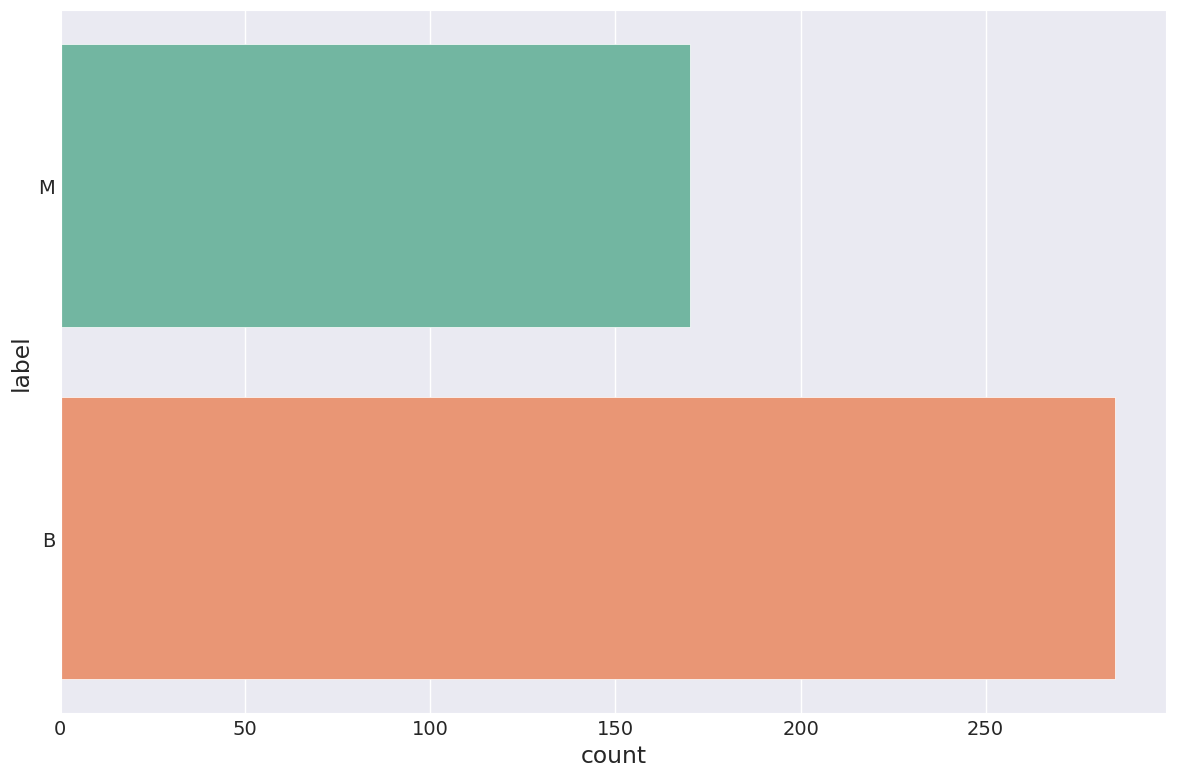

In [10]:
sns.countplot(df, y='label', hue='label', palette='Set2')
plt.tight_layout()

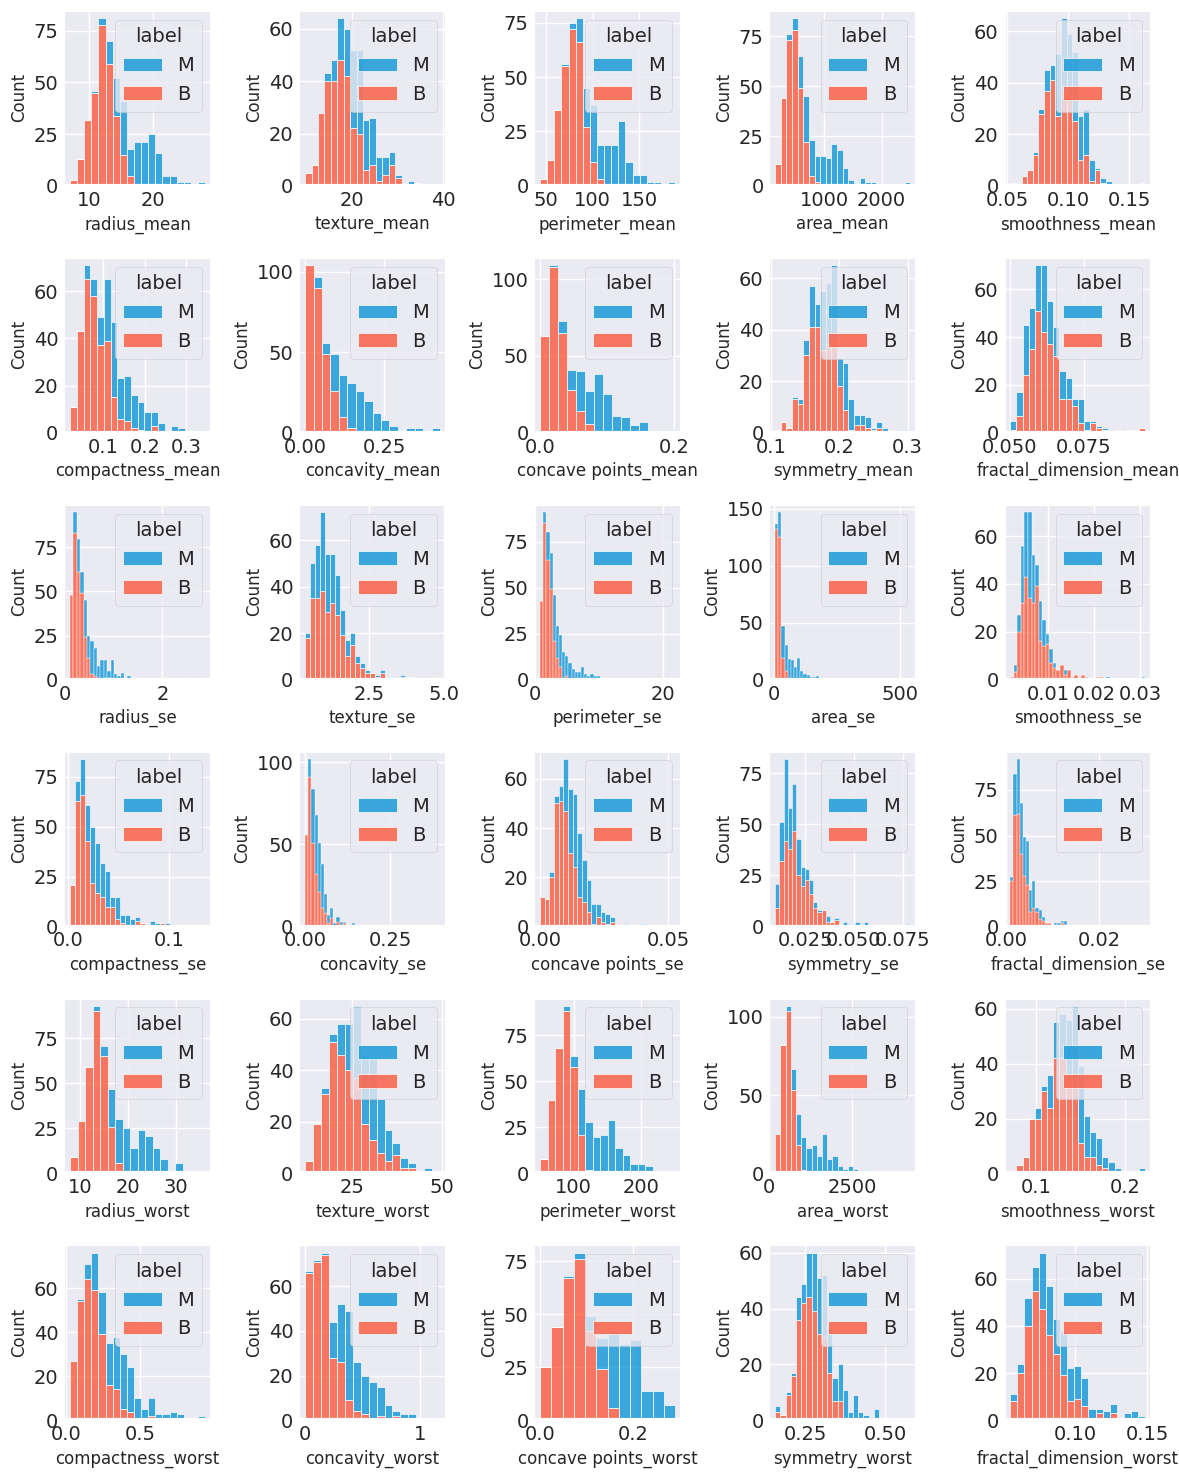

In [11]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.histplot(df, x=c, hue='label', multiple='stack')
    plt.xlabel(c, fontsize=12)
    plt.ylabel('Count', fontsize=12)
plt.tight_layout()

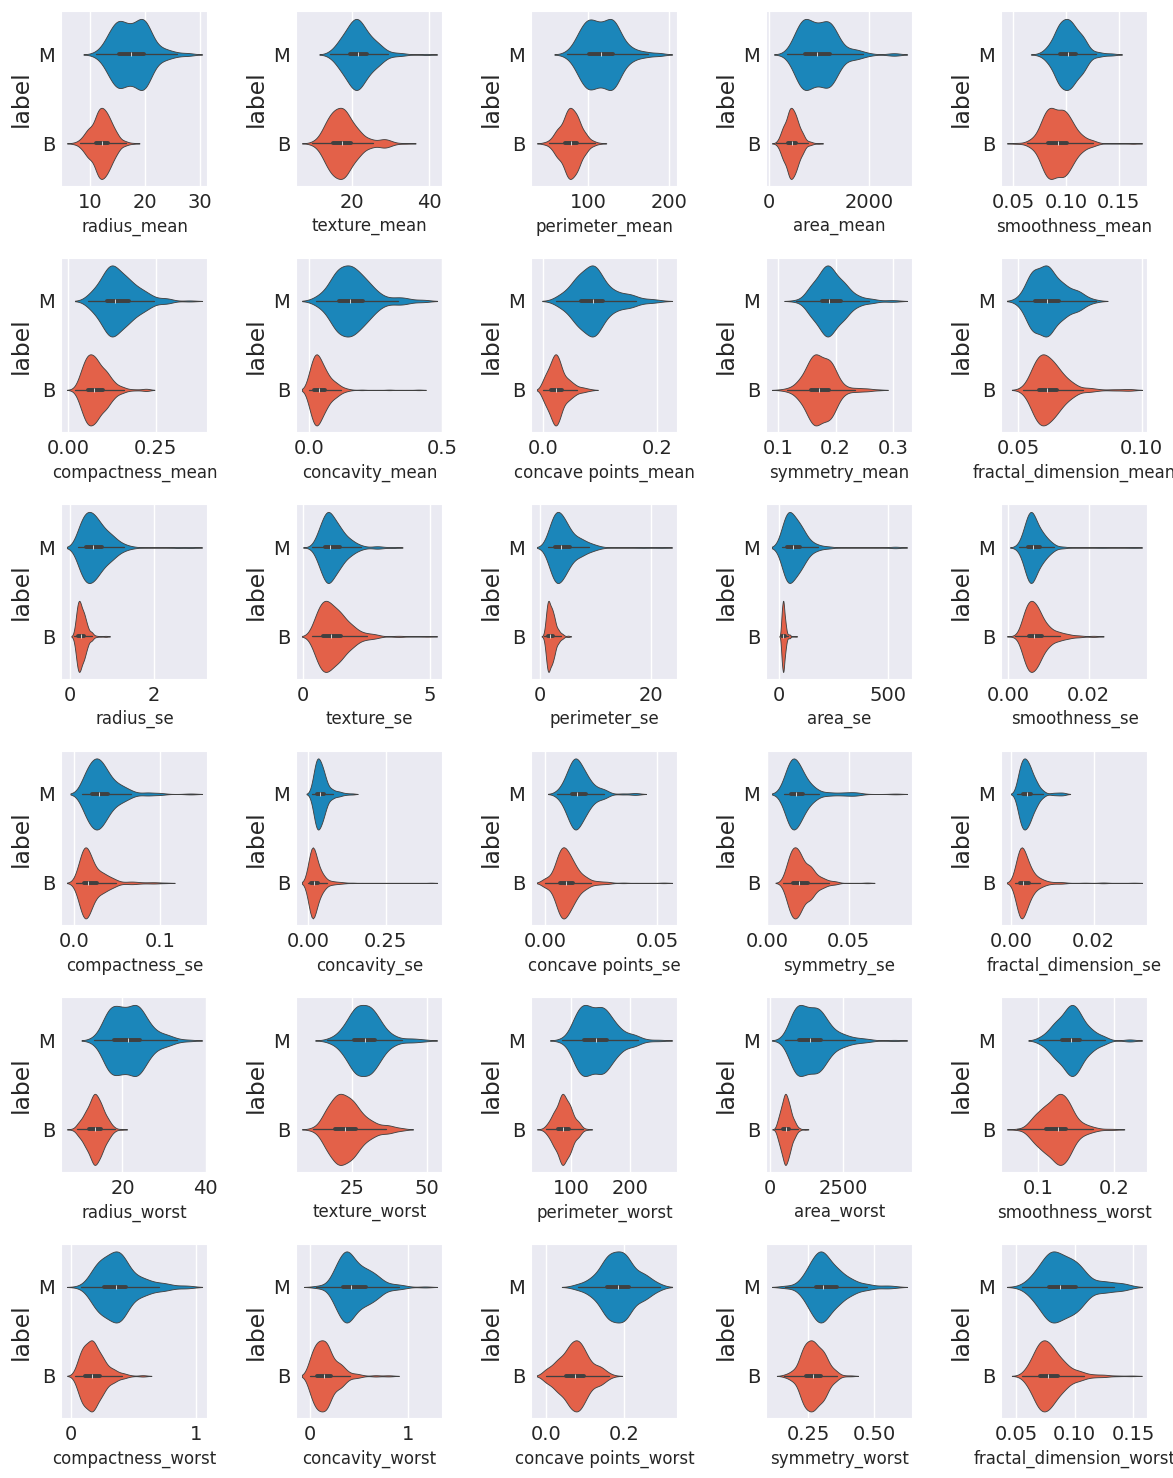

In [12]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.violinplot(df, x=c, y='label', hue='label')
    plt.xlabel(c, fontsize=12)
plt.tight_layout()

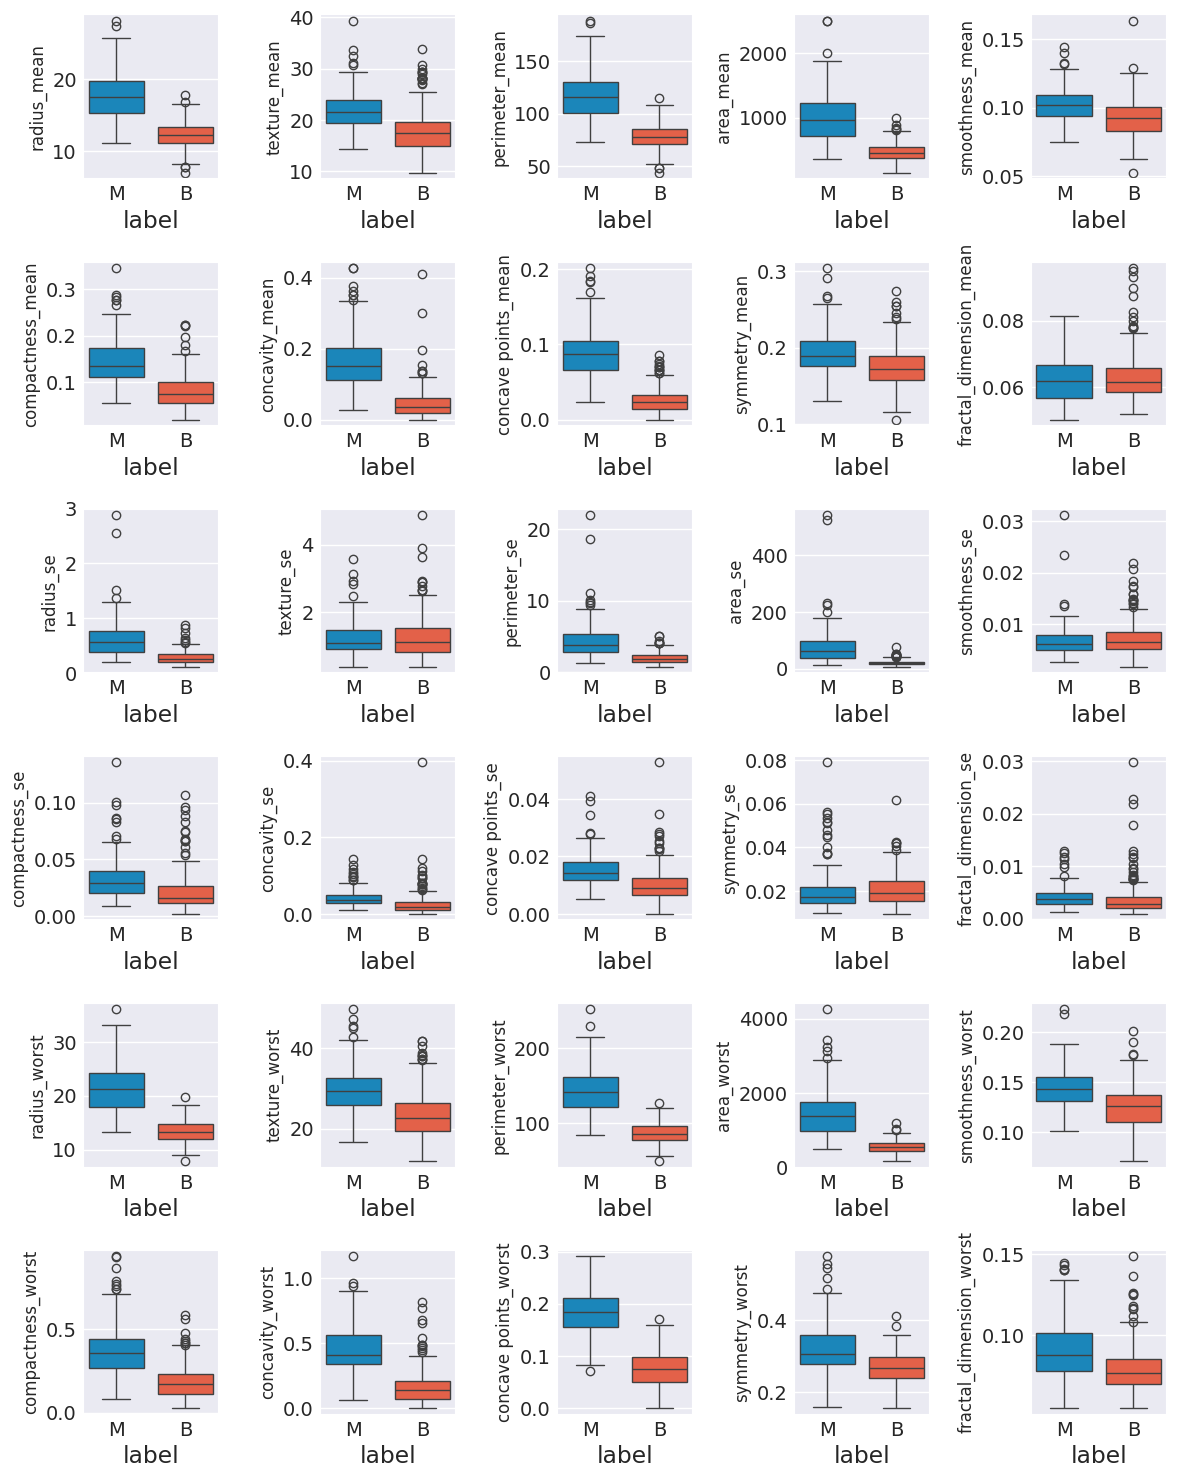

In [13]:
plt.figure(figsize=(12, 15))
for i, c in enumerate(df.columns[1:]):
    plt.subplot(6, 5, i+1)
    sns.boxplot(df, x='label', y=c, hue='label')
    plt.ylabel(c, fontsize=12)
plt.tight_layout()

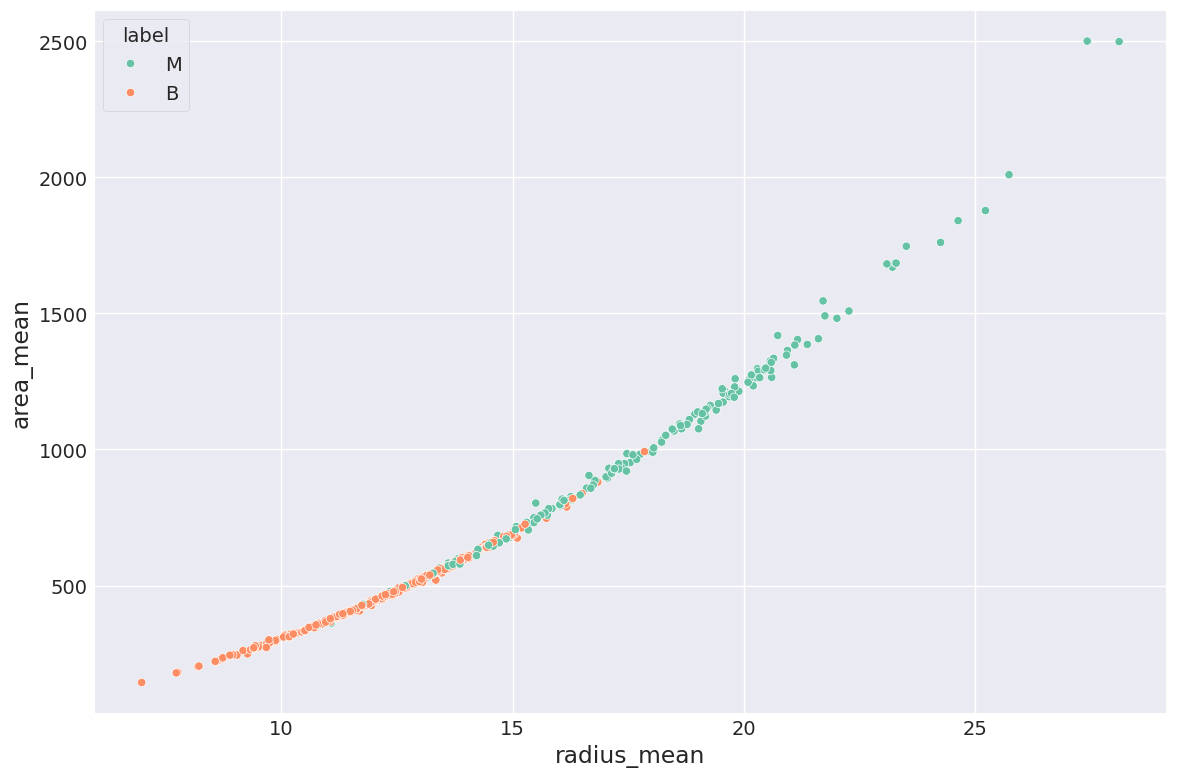

In [14]:
sns.scatterplot(
    df,
    x='radius_mean',
    y='area_mean',
    hue='label',
    palette='Set2'
)
plt.tight_layout()

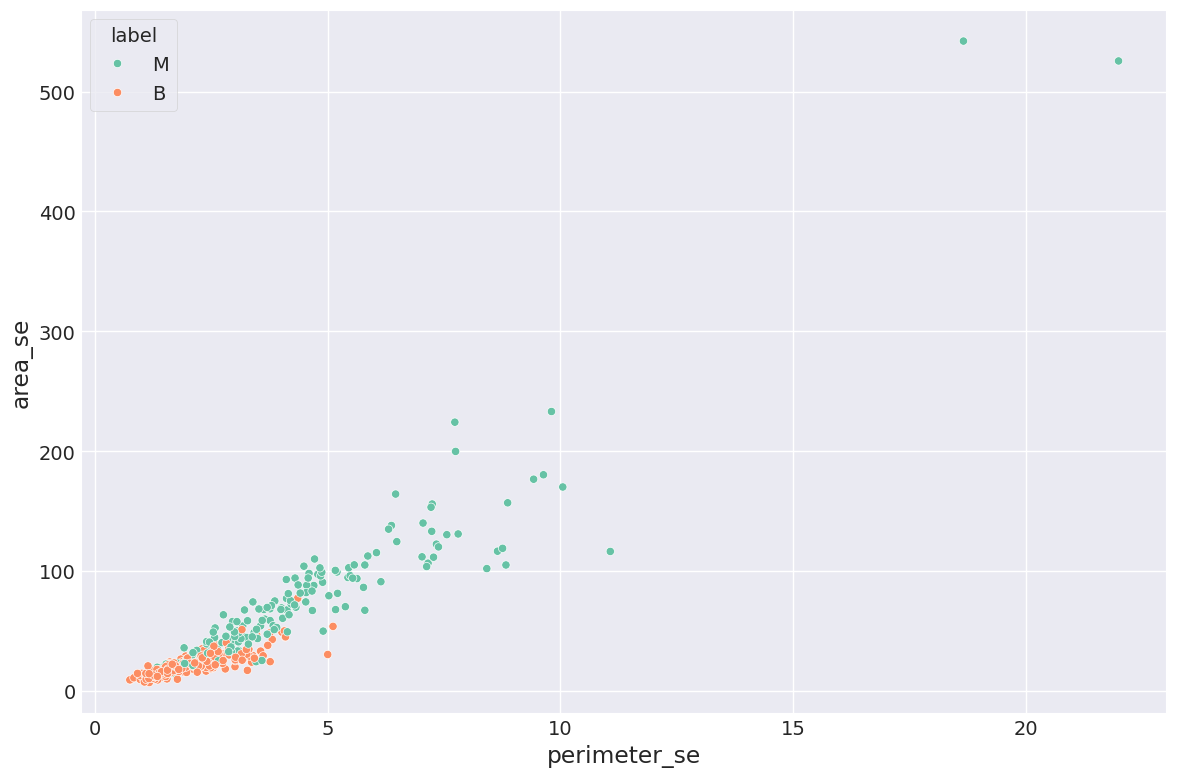

In [15]:
sns.scatterplot(
    df,
    x='perimeter_se',
    y='area_se',
    hue='label',
    palette='Set2'
)
plt.tight_layout()

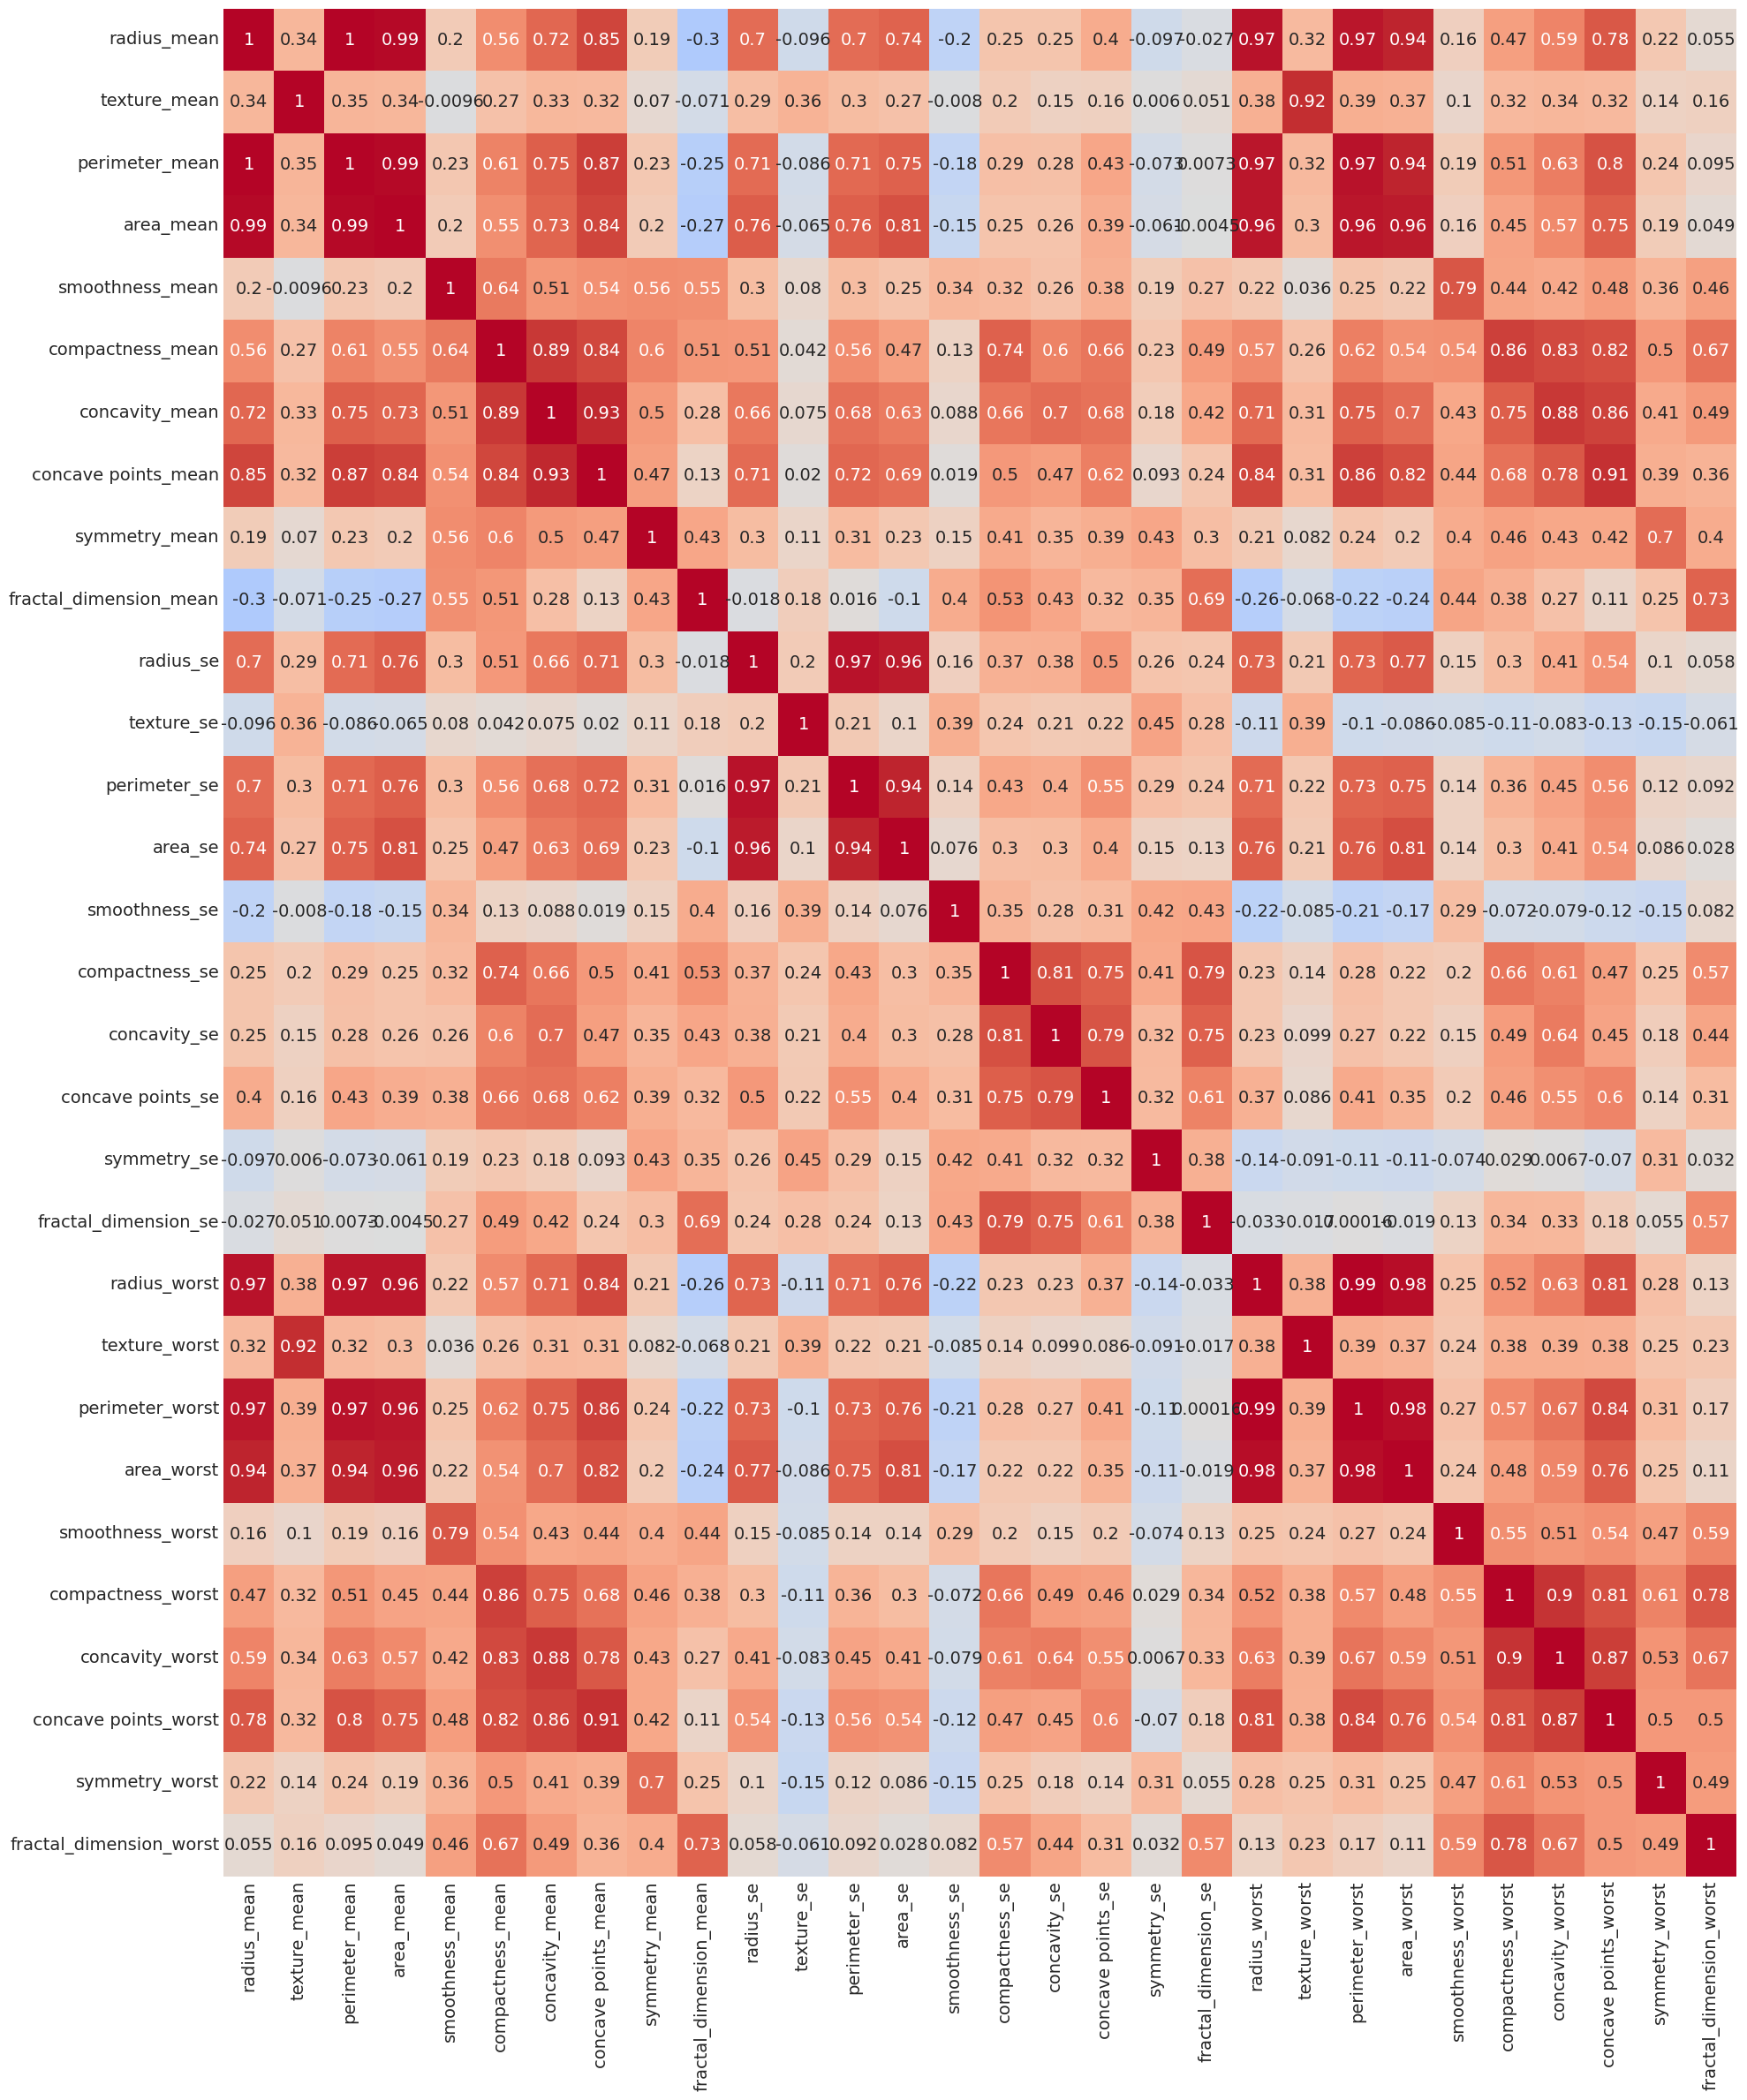

In [16]:
plt.figure(figsize=(20, 24))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar=False
)
plt.tight_layout()

## 4. Data Preprocessing

In [17]:
x = df.drop(columns=['label'])
y = df['label']

In [18]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [19]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42)

In [21]:
x_train.shape

(364, 30)

## 5. Model Training

In [22]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(),
    'XGBClassifier': xgb.XGBClassifier(),
    'LightGBMClassifier': lgb.LGBMClassifier(verbose=-1)
}

def evaluate(x_train, y_train, x_test, y_test):
    results = []

    for i, (model_name, model) in enumerate(tqdm(models.items())):
        if 'random_state' in model.get_params():
            model.set_params(random_state=42)

        print(f'Training {model_name}...')
        y_pred = model.fit(x_train, y_train).predict(x_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        plt.subplot(3, 5, i+1)
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(model_name, fontsize=12)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
        
    plt.suptitle('Confusion Matrices of All Models')
    plt.tight_layout()
    
    report = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

  0%|          | 0/12 [00:00<?, ?it/s]

Training GaussianNB...
Training MultinomialNB...
Training BernoulliNB...
Training LogisticRegression...
Training ExtraTreesClassifier...
Training DecisionTreeClassifier...
Training RandomForestClassifier...
Training GradientBoostingClassifier...
Training KNeighborsClassifier...
Training SVC...
Training XGBClassifier...
Training LightGBMClassifier...


,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,1.000000,1.000000,1.000000,1.000000
1,LightGBMClassifier,1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier,1.000000,1.000000,1.000000,1.000000
3,ExtraTreesClassifier,0.989011,0.982759,0.992063,0.987228
4,SVC,0.989011,0.982759,0.992063,0.987228
5,GradientBoostingClassifier,0.989011,0.992188,0.982143,0.986972
6,GaussianNB,0.967033,0.951613,0.976190,0.962381
7,RandomForestClassifier,0.967033,0.957453,0.966270,0.961684
8,XGBClassifier,0.967033,0.957453,0.966270,0.961684
9,MultinomialNB,0.945055,0.963235,0.910714,0.931896


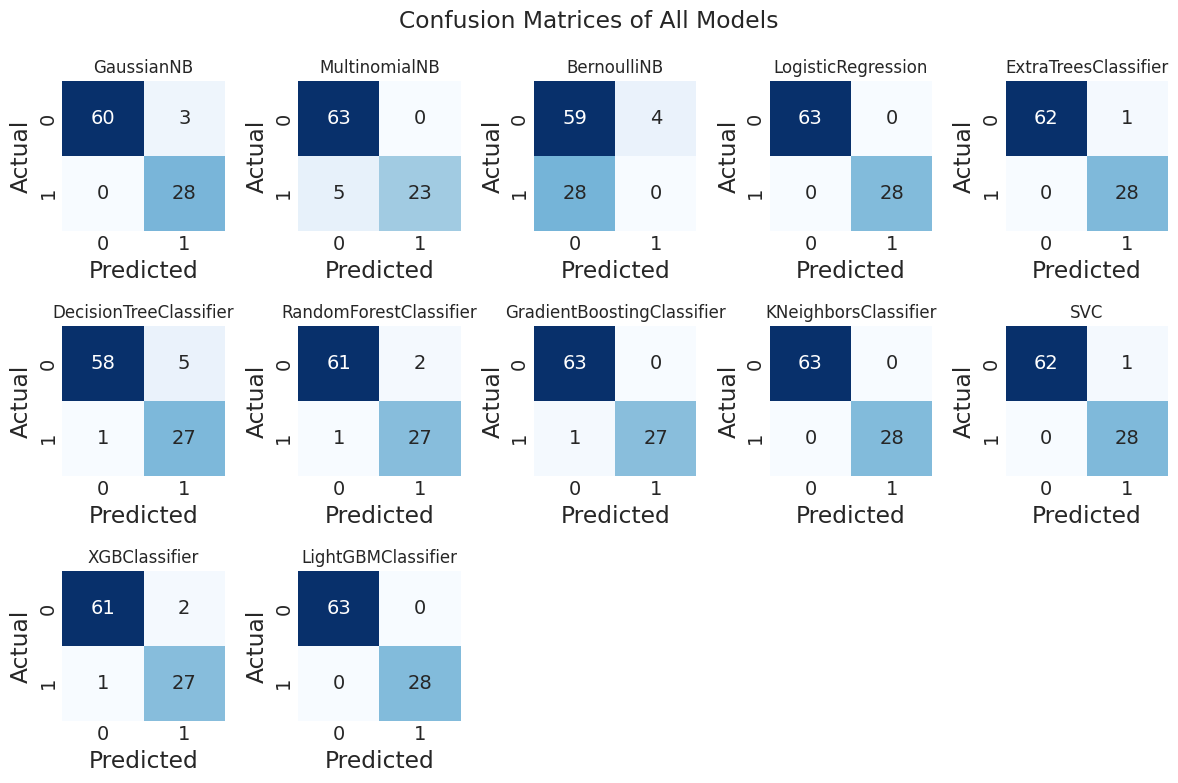

In [23]:
evaluate(x_train, y_train, x_test, y_test)

## 6. Build Pipeline with the best model, Save the model, Make Submission

In [24]:
preprocessor = ColumnTransformer([
    ('scaler', MinMaxScaler(), x.columns),
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb.LGBMClassifier(verbose=-1))
])
pipeline.fit(x, y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
pipeline.score(x, y)

1.0

In [26]:
y_pred = pipeline.predict(x)

In [27]:
confusion_matrix(y, y_pred)

array([[285,   0],
       [  0, 170]])

In [28]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [29]:
joblib.dump(pipeline, 'breast_cancer_pipeline.pkl')

['breast_cancer_pipeline.pkl']

In [30]:
test_df = pd.read_csv('test.csv', index_col='id')
predictions = pipeline.predict(test_df)
submission = pd.DataFrame({
    'id': test_df.index,
    'label': predictions
})
submission.head()

,id,label
0,906564,B
1,85715,M
2,891670,B
3,874217,M
4,905680,B


In [31]:
submission.to_csv('submission.csv', index=False)

## 7. Conclusion
We built an end-to-end pipeline to predict the breast cancer classification. We used the `LGBMClassifier` as the best model. We saved the pipeline for future use and used it to predict the labels for the test set.